**This notebook contains EDA of landmark dataset**

In [1]:
import numpy as np
import pandas as pd
import collections

### Explore quantity of images (and quantity of images per landmark class) in dataset

In [3]:
# load training data file from https://www.kaggle.com/competitions/landmark-recognition-2021/data?select=train.csv
TRAINING_FILE = 'data/train.csv'
df_train = pd.read_csv(TRAINING_FILE)

# print total number of images
print(df_train.columns)
print(f'Total Images: {len(df_train.landmark_id.values)}')

Index(['id', 'landmark_id'], dtype='object')
Total Images: 1580470


In [4]:
# count images per class
def extract_class_statistics(df_train):
    classes = {}
    for lid in df_train.landmark_id.values:
        if lid not in classes:
            classes[lid] = 0
        classes[lid] += 1
    return classes


# find classes with images >= threshold
def classes_more_than_threshold(classes, threshold):
    reduced_classes = {}
    for key, value in classes.items():
        if value >= threshold:
            reduced_classes[key] = value
    return reduced_classes

In [5]:
classes = extract_class_statistics(df_train)
sorted_classes = {k: v for k, v in sorted(classes.items(), key=lambda item: item[1], reverse=True)}

In [6]:
print(f'Total Clases: {len(classes)}')

Total Clases: 81313


In [7]:
threshold = 200
reduced_classes = classes_more_than_threshold(classes, threshold)
print(f'Total Clases with atleast {threshold} images: {len(reduced_classes)}')

Total Clases with atleast 200 images: 491


In [8]:
for i in range(1000, 0, -100):
    reduced_classes = classes_more_than_threshold(classes, i)
    print(f'Total Clases with atleast {i} images: {len(reduced_classes)}')

Total Clases with atleast 1000 images: 7
Total Clases with atleast 900 images: 12
Total Clases with atleast 800 images: 19
Total Clases with atleast 700 images: 27
Total Clases with atleast 600 images: 35
Total Clases with atleast 500 images: 51
Total Clases with atleast 400 images: 81
Total Clases with atleast 300 images: 196
Total Clases with atleast 200 images: 491
Total Clases with atleast 100 images: 2015


In [9]:
for i in range(100, 0, -10):
    reduced_classes = classes_more_than_threshold(classes, i)
    print(f'Total Clases with atleast {i} images: {len(reduced_classes)}')

Total Clases with atleast 100 images: 2015
Total Clases with atleast 90 images: 2458
Total Clases with atleast 80 images: 3026
Total Clases with atleast 70 images: 3801
Total Clases with atleast 60 images: 4916
Total Clases with atleast 50 images: 6501
Total Clases with atleast 40 images: 8876
Total Clases with atleast 30 images: 13018
Total Clases with atleast 20 images: 20731
Total Clases with atleast 10 images: 39676


In [10]:
for i in range(10, 0, -1):
    reduced_classes = classes_more_than_threshold(classes, i)
    print(f'Total Clases with atleast {i} images: {len(reduced_classes)}')

Total Clases with atleast 10 images: 39676
Total Clases with atleast 9 images: 43069
Total Clases with atleast 8 images: 46912
Total Clases with atleast 7 images: 51471
Total Clases with atleast 6 images: 57042
Total Clases with atleast 5 images: 64016
Total Clases with atleast 4 images: 72322
Total Clases with atleast 3 images: 76563
Total Clases with atleast 2 images: 81313
Total Clases with atleast 1 images: 81313


### Explore image size

In [11]:
import cv2
import os

def load_images_from_folder(folder):
    size_dict = {}
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            img_shape = str(img.shape[0]) + "-" + str(img.shape[1])            
            
            if img_shape not in size_dict:                
                size_dict[img_shape] = 0
            size_dict[img_shape] += 1
            
    return size_dict

In [ ]:
folder = 'C:/W281-Project/Data/landmark-recognition-2021/train/0/0/0'
size_dict = load_images_from_folder(folder)

In [14]:
len(size_dict)

106

In [15]:
sorted_size_dict = {k: v for k, v in sorted(size_dict.items(), key=lambda item: item[1], reverse=True)}

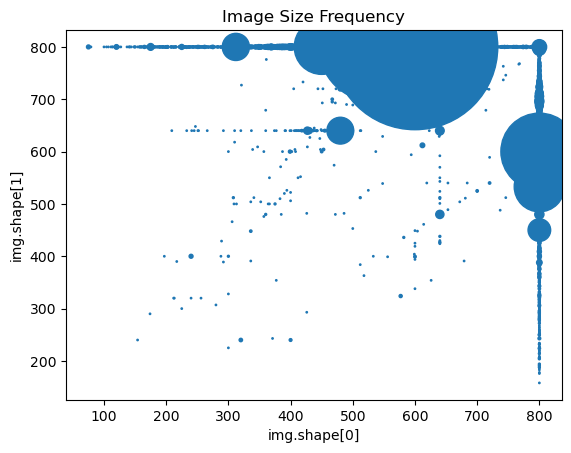

In [24]:
plt.scatter(x = [item[0] for item in sorted_size_dict.keys()], 
            y = [item[1] for item in sorted_size_dict.keys()], s = [freq for freq in sorted_size_dict.values()])
plt.xlabel('img.shape[0]')
plt.ylabel('img.shape[1]');
plt.title('Image Size Frequency')
plt.show()

### Example Images from 51 class data subset

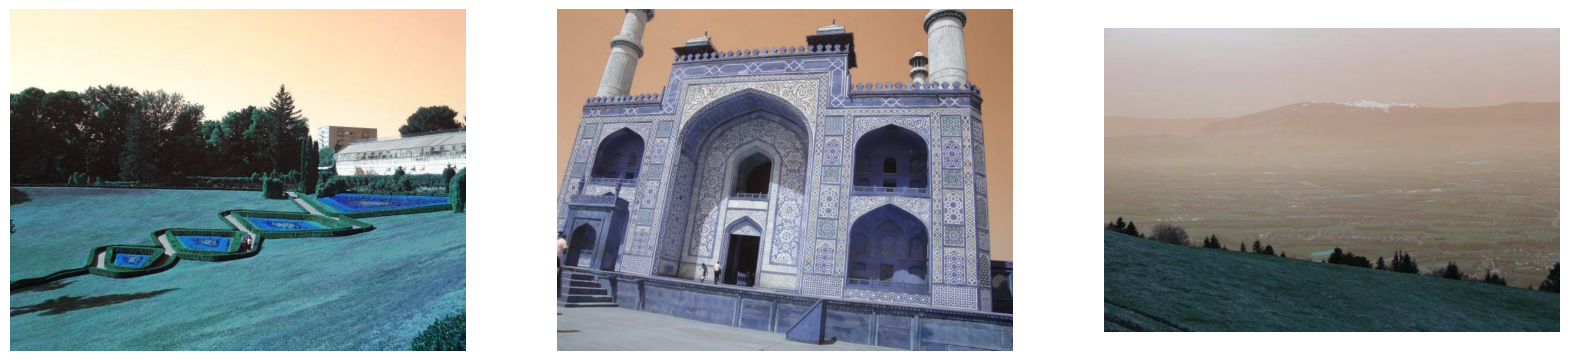

In [36]:
target_images_ls = os.listdir('TargetImages')
im1 = cv2.imread('TargetImages/' + target_images_ls[150])
im2 = cv2.imread('TargetImages/' + target_images_ls[2060])
im3 = cv2.imread('TargetImages/' + target_images_ls[500])
fig, ax = plt.subplots(1, 3, figsize = (20, 10))
ax[0].imshow(im1)
ax[0].axis("off")
ax[1].imshow(im2)
ax[1].axis("off")
ax[2].imshow(im3)
ax[2].axis("off")
plt.show()